In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [22]:
scores_files = ["sc_fair.csv", "sc_adamic_adar.csv", "sc_jaccard_coefficient.csv",
                "sc_preferential_attachment.csv", "sc_node2vec.csv", "sc_fairwalk.csv", "sc_hybrid_node2vec.csv",
                "sc_dyadic_fair.csv"]
accept_prob_files = ["accept_prob_fair.csv", "accept_prob_node2vec.csv", "accept_prob_fairwalk.csv",
                     "accept_prob_hybrid_node2vec.csv"]
NAMES = {"sc_fair.csv": "Fair", "sc_adamic_adar.csv": "ADA", "sc_jaccard_coefficient.csv" : "JC",
                "sc_preferential_attachment.csv": "PA", "sc_node2vec.csv": "n2v", 
         "sc_fairwalk.csv": "FairWalk", "sc_hybrid_node2vec.csv": "ExpFair", "sc_dyadic_fair.csv": "Balanced"}

In [23]:
def plot_scores(dataset):
    for sf in scores_files:
        df = pd.read_csv(dataset + "/" + sf)
        name = NAMES[sf]
        plt.plot(df["Rounds"], df["Scores"], label=name, linestyle=':', marker="*")
        plt.ylabel('Scores')
        plt.xlabel('Rounds')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [24]:
def plot_accept_prob(dataset):
    for sf in accept_prob_files:
        df = pd.read_csv(dataset + "/" + sf)
        name = sf.split(".")[0].split("_")[2]
        plt.plot(df["Rounds"], df["Acceptance_prob"], label=name, linestyle=':', marker="*")
        plt.ylabel('Acceptance_prob')
        plt.xlabel('Rounds')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [25]:
def plot_unique_targets(dataset):
    unique_targets = dict()
    rounds = 11

    for sf in scores_files:
        df = pd.read_csv(f"{dataset}/" + sf)
        unique_targets[sf] = set()
        for r in range(1, rounds):
            edges = eval(df["Edges"][r])
            unique_targets[sf] = unique_targets[sf].union(set([j for i,j in edges]))
        unique_targets[sf] = list(unique_targets[sf])

    unique_targets_num = dict()
    for sf in scores_files:
        unique_targets_num[sf] = len(unique_targets[sf])

    b = pd.DataFrame(unique_targets_num.items())
    sns.barplot(x=b[1], y=b[0])
    plt.title(f"{dataset}")
    plt.ylabel("Policy")
    plt.xlabel("Number of Unique Targets")
    print(unique_targets_num)

In [26]:
dataset = "books"
sf = "sc_fair.csv"
df = pd.read_csv(dataset + "/" + sf)
df

,Rounds,Edges,Scores
0,-1,NaN,0.471360
1,0,"[(6, 70), (10, 70), (19, 85), (26, 3), (40, 85...",0.507786
2,1,"[(6, 74), (10, 74), (19, 82), (26, 91), (40, 8...",0.530431
3,2,"[(6, 72), (10, 72), (19, 81), (26, 9), (40, 81...",0.546114
4,3,"[(6, 73), (10, 73), (19, 22), (26, 32), (40, 2...",0.557666
5,4,"[(6, 71), (10, 71), (19, 21), (26, 83), (40, 2...",0.566314
6,5,"[(6, 7), (10, 7), (19, 90), (26, 89), (40, 90)...",0.573071
7,6,"[(6, 0), (10, 0), (19, 76), (26, 84), (40, 76)...",0.578384
8,7,"[(6, 1), (10, 1), (19, 79), (26, 88), (40, 79)...",0.582476
9,8,"[(6, 3), (10, 8), (19, 75), (26, 77), (40, 75)...",0.585690


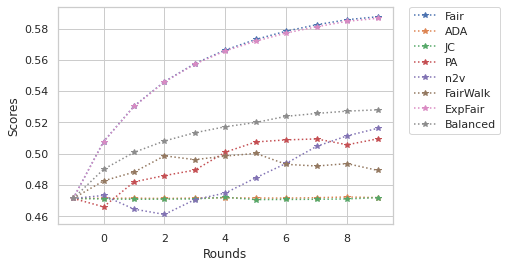

In [27]:
plot_scores("books")

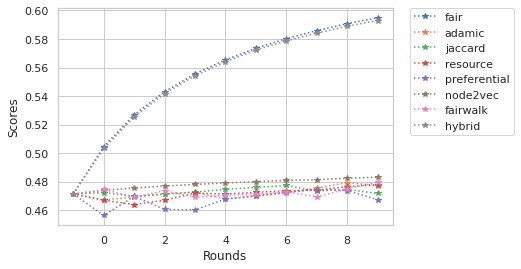

In [6]:
plot_scores("books")

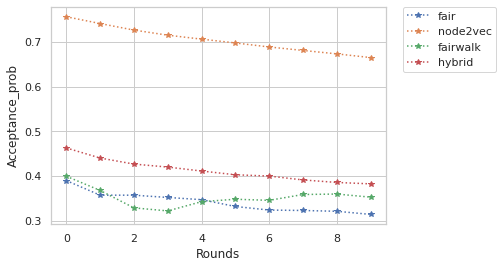

In [7]:
plot_accept_prob("books")

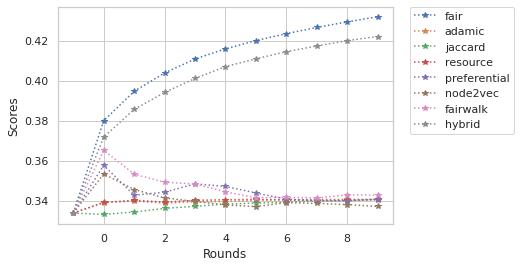

In [8]:
plot_scores("blogs")

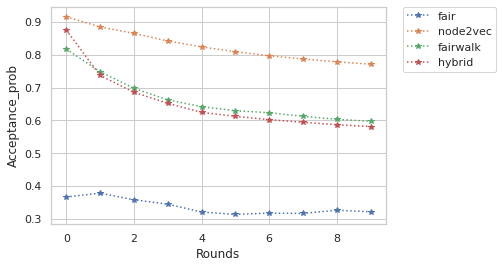

In [9]:
plot_accept_prob("blogs")

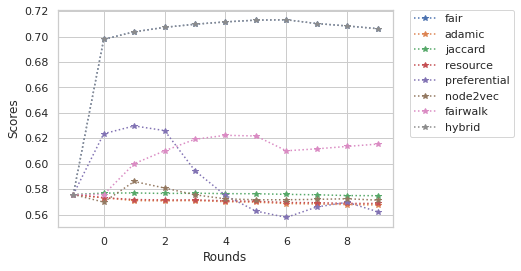

In [10]:
plot_scores("twitter")

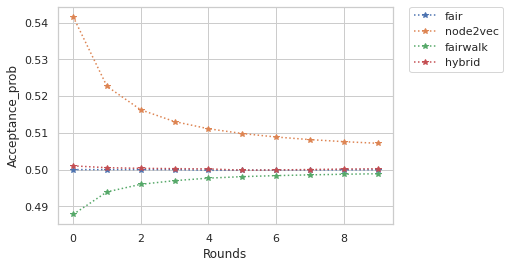

In [11]:
plot_accept_prob("twitter")

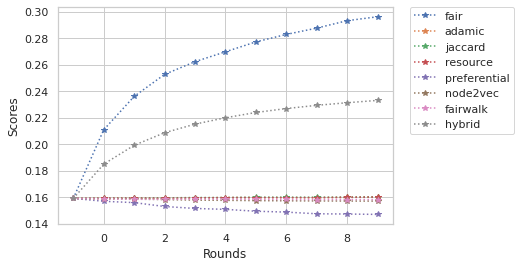

In [12]:
plot_scores("dblp_course")

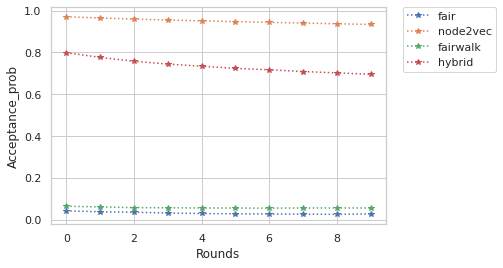

In [13]:
plot_accept_prob("dblp_course")

{'sc_fair.csv': 15, 'sc_adamic_adar.csv': 61, 'sc_jaccard_coefficient.csv': 61, 'sc_resource_allocation.csv': 63, 'sc_preferential_attachment.csv': 17, 'sc_node2vec.csv': 41, 'sc_fairwalk.csv': 41, 'sc_hybrid_node2vec.csv': 25}


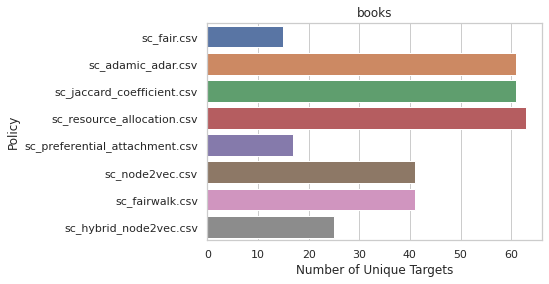

In [19]:
plot_unique_targets("books")

{'sc_fair.csv': 11, 'sc_adamic_adar.csv': 327, 'sc_jaccard_coefficient.csv': 662, 'sc_resource_allocation.csv': 372, 'sc_preferential_attachment.csv': 23, 'sc_node2vec.csv': 63, 'sc_fairwalk.csv': 49, 'sc_hybrid_node2vec.csv': 51}


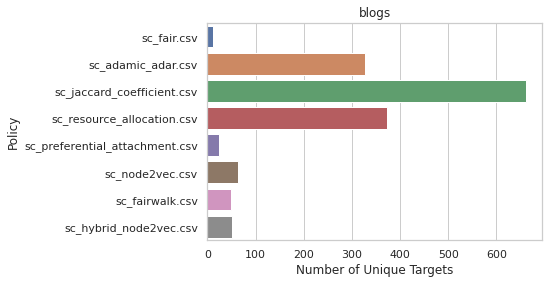

In [20]:
plot_unique_targets("blogs")

{'sc_fair.csv': 32, 'sc_adamic_adar.csv': 4782, 'sc_jaccard_coefficient.csv': 7351, 'sc_resource_allocation.csv': 5160, 'sc_preferential_attachment.csv': 19, 'sc_node2vec.csv': 96, 'sc_fairwalk.csv': 118, 'sc_hybrid_node2vec.csv': 38}


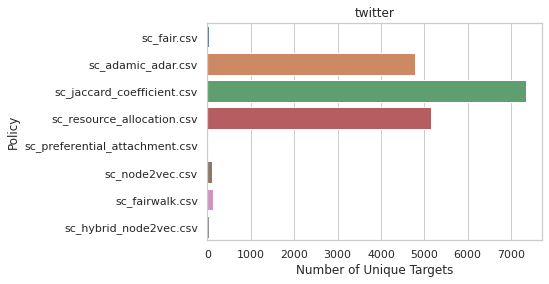

In [21]:
plot_unique_targets("twitter")

{'sc_fair.csv': 70, 'sc_adamic_adar.csv': 6011, 'sc_jaccard_coefficient.csv': 6561, 'sc_resource_allocation.csv': 6127, 'sc_preferential_attachment.csv': 23, 'sc_node2vec.csv': 2768, 'sc_fairwalk.csv': 7142, 'sc_hybrid_node2vec.csv': 1232}


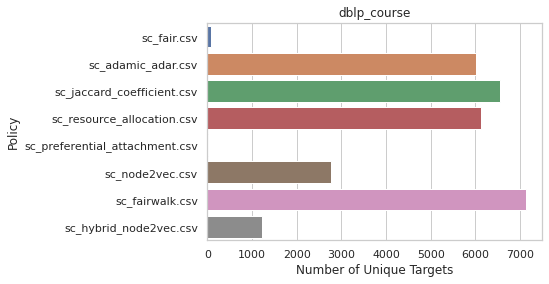

In [22]:
plot_unique_targets("dblp_course")